Consider the following training data set:
$$
\begin{eqnarray}
x1 = (1; 0);\ y1 = −1 \quad x2 = (0; 1); \ y2 = −1 \quad x3 = (0; −1);\ y3 = −1 \\ 
x4 = (−1; 0);\ y4 = +1 \quad x5 = (0; 2); \ y5 = +1 \quad x6 = (0; −2); \ y6 = +1 \\
x7 = (−2; 0);\ y7 = +1
\end{eqnarray}
$$

1.Use following nonlinear transformation of the input vector $x = (x1; x2)$ to the transformed vector $z = (\phi_{1}(x); \phi_{2}(x))$:
$$
\phi_{1}(x) = 2x_{2}^{2} − 4x_{1} + 2  \quad \phi_{2}(x) = x_{1}^{2} − 2x_{2} − 1
$$
What is the equation of the optimal separating "hyperplane" in the $ Z $ space? Explain your answer,
mathematically or pictorially

2.Consider the same training data set as Question 1, but instead of explicitly transforming the input space $ X $ to $ Z $ , apply the hard-margin support vector machine algorithm with the kernel function
$$ K(x; x_{0}) = (1 + 2x^{T} x_{0})^{2} $$
which corresponds to a second-order polynomial transformation. Set up the optimization problem using $ (\alpha_{1}, ..., \alpha_{7}) $ and numerically solve for them (you can use any package you want). What is
the optimal $ \mathbf{\alpha} $ ? Based on those $ \mathbf{\alpha} $ , which are the support vectors?

3.Following Question 2, what is the corresponding nonlinear curve in the $ X $ space? Please provide calculation steps of your choice.

4.Compare the two nonlinear curves found in Questions 1 and 3, should they be the same? Why or why not?

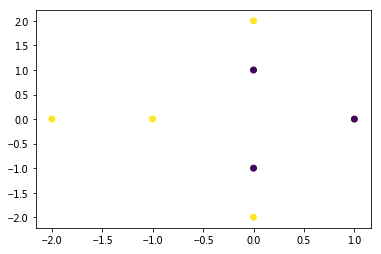

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

def phi1(x1, x2):
    return 2 * x2* x2 - 4 * x1 + 2

def phi2(x1, x2):
    return x1 * x1 - 2 * x2 - 1

X = np.array([[1, 0],
              [0, 1],
              [0, -1], 
              [-1, 0], 
              [0, 2],
              [0, -2],
              [-2, 0]])
Y = np.array([-1, -1, -1, 1, 1, 1, 1])

plt.scatter(X[:, 0], X[:, 1], c=Y)

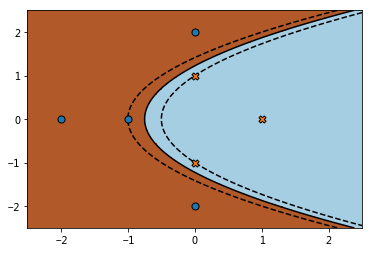

In [2]:
Z = np.array([[phi1(x1, x2), phi2(x1, x2)] for x1, x2 in X])
# plt.scatter(Z[:, 0], Z[:, 1], c=Y)

clf_trans = SVC(C=np.inf, kernel='linear', shrinking=False)
clf_trans.fit(Z, Y) 

XX, YY = np.mgrid[-2.5: 2.5:200j, -2.5: 2.5:200j]
ZZ_trans = clf_trans.decision_function(np.c_[phi1(XX.ravel(), YY.ravel()), phi2(XX.ravel(), YY.ravel())])
ZZ_trans = ZZ_trans.reshape(XX.shape)

plt.scatter(X[Y>0][:, 0], X[Y>0][:, 1], marker='o', zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=50)
plt.scatter(X[Y<0][:, 0], X[Y<0][:, 1], marker='X', zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=50)

plt.pcolormesh(XX, YY, ZZ_trans > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, ZZ_trans, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

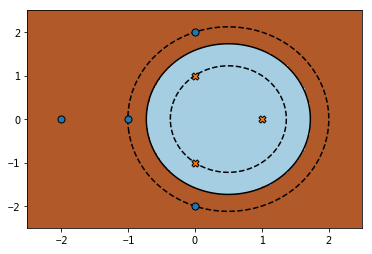

In [3]:
def kernel_poly2(in_x1, in_x2):
#     print(in_x1)
#     print(in_x2)
    return np.square(1 + 2 * np.dot(np.array(in_x1), np.array(in_x2).T))

clf_poly2 = SVC(C=np.inf, kernel=kernel_poly2, shrinking=False, verbose=False)
clf_poly2.fit(X, Y)

# 绘图
XX, YY = np.mgrid[-2.5: 2.5:200j, -2.5: 2.5:200j]
ZZ_poly2 = clf_poly2.decision_function(np.c_[XX.ravel(), YY.ravel()])
ZZ_poly2 = ZZ_poly2.reshape(XX.shape)

plt.scatter(X[Y>0][:, 0], X[Y>0][:, 1], marker='o', zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=50)
plt.scatter(X[Y<0][:, 0], X[Y<0][:, 1], marker='X', zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=50)

plt.pcolormesh(XX, YY, ZZ_poly2 > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, ZZ_poly2, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

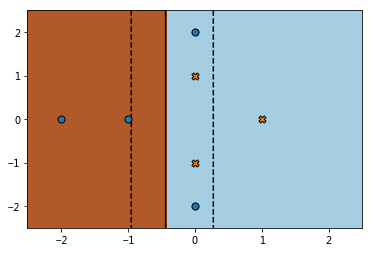

In [4]:
# 以下演示旨在说明决策边界不能直接写为 K(w, x) + b的形式, 
# 因为加法数乘关于Kernel运算不可交换

w_poly2 = (X[clf_poly2.support_] * clf_poly2.dual_coef_.T).sum(axis=0)
b_poly2 = clf_poly2.intercept_

XX, YY = np.mgrid[-2.5: 2.5:200j, -2.5: 2.5:200j]
ZZ_formula = kernel_poly2(w_poly2, np.c_[XX.ravel(), YY.ravel()]) + b_poly2

ZZ_formula = ZZ_formula.reshape(XX.shape)

plt.scatter(X[Y>0][:, 0], X[Y>0][:, 1], marker='o', zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=50)
plt.scatter(X[Y<0][:, 0], X[Y<0][:, 1], marker='X', zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=50)

plt.pcolormesh(XX, YY, ZZ_formula > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, ZZ_formula, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])